# Paintball
Go through the paintball example in chapter 9

In [8]:
import thinkbayes2
import thinkplot
import numpy as np
import math
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/francesco/PersonalProjects/ThinkBayes2/')
from scripts import paintball

The problem is clear: there is a shooter in an unknown position in a room and we only observe his bullets hitting the wall. We want to infer his position from the observations.

The position is in 2D and we are supposing that the he is shooting towards a single wall. The (unknown) position of the shooter is expressed by $(\alpha, \beta)$, the position of the bullet is $x$ and the shooting angle is $\theta$:

<img src="paintball.png" style="width: 200px;"/>

The general approach to this kind of problems is always the same: let's treat the quantities we want to find as parameters when trying to find the probability distribution of the data, in this case P($x$|$\alpha$,$\beta$). Than, using Bayes' theorem, we can compute the posterior of the parameters given the data.

As stated above, we observe the position of the bullet $\alpha + x$ and we want to infer the position of the shooter $(\alpha, \beta)$. As a first step we need to find a connection between the two:
$$x - \alpha = \beta \tan \theta$$

From the book:
> As a simple model, imagine that the opponent is like a rotating turret, equally likely to shoot in any direction.

This means assuming that $\theta$ has a uniform distribution. In order to check what this assumption means in terms of $x$, let's assume we know $\alpha$ and $\beta$, which then fixes the lower and upper bounds for $\theta$, assuming that the shooter only shoots towards one wall and we know the lenght of the wall ($L$).

In [5]:
L = 30
alpha = 10
beta = 15

thetaMin = - ((math.pi/2) - math.atan2(beta, alpha))
thetaMax = math.atan2((L-alpha), beta)

theta = np.random.uniform(thetaMin, thetaMax, 15000)
x = beta * np.tan(theta) + alpha

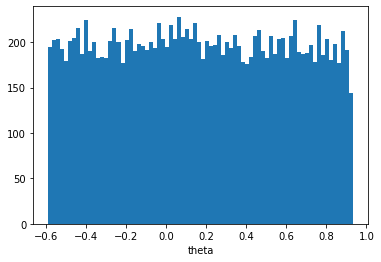

In [6]:
step = .02
bins = np.arange(thetaMin, thetaMax+step, step)

plt.figure()
plt.hist(theta, bins=bins);

plt.xlabel('theta');

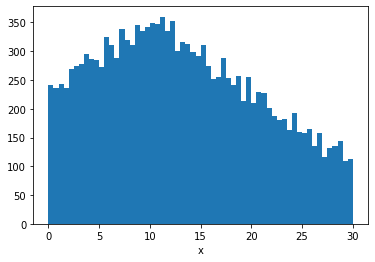

In [7]:
step = .5
bins = np.arange(x.min(), x.max()+step, step)

plt.figure()
plt.hist(x, bins=bins);

plt.xlabel('x');

The above makes sense, of course and it is the reason behind the next sentence in the book:
> In that case, he is most likely to hit the wall at location `alpha`, and less likely to hit the wall far away from `alpha`.

Here one should investigate better the transformation of the probability distribution in order to get the exact P($x$) given P($\theta$) and the relationship between the two variables.

The main idea to solve the problem is: once we observe $x$, we can compute $\theta$ simply reversing the above formula:
$$\theta = \tan^{-1}(\frac{x - \alpha}{\beta})$$

Then Allen claims that the probability of $x$ is proportional to the inverse of the derivative of $x$ wrt/ $\theta$, $\frac{\textrm{d}x}{\rm{d}\theta}$:
$$\frac{\textrm{d} x}{\rm{d}\theta} = \frac{\beta}{\cos^{2}\theta} = s(\theta)$$

So in principle, having $\alpha$ and $\beta$ it is possible to compute P($x$):
$$\textrm{P}(x) \propto \frac{1}{s(\theta(\alpha,\beta))}$$
This is computed in `MakeLocationPmf(...)`.

In [9]:
locations = np.linspace(0, L, 1000)
pmf = paintball.MakeLocationPmf(alpha, beta, locations)

No handles with labels found to put in legend.


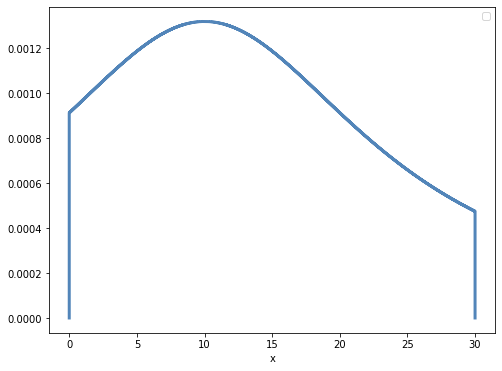

In [11]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Pmf(pmf)
thinkplot.config(xlabel='x',
                ylable='PMF')

The above is consistent with the empiric distribution found earlier.

The above formula of P($x$) is indeed P($x$|$\alpha$, $\beta$) which is all we need to compute the likelihood, and indeed it's used in the `Paintball` class:
```
def Likelihood(self, data, hypo):
    """Computes the likelihood of the data under the hypothesis.
    hypo: pair of alpha, beta
    data: location of a hit
    Returns: float likelihood
    """
    alpha, beta = hypo
    x = data
    pmf = MakeLocationPmf(alpha, beta, self.locations)
    like = pmf.Prob(x)
    return like
```
In particular `hypo` contains the hypotetical pair ($\alpha$, $\beta$), this pair is used to compute the P($x$) distribution and then the particular value of the observed $x$ is taken.

Here the important thing is that the hypotheses are composed of 2 values, $\alpha$ and $\beta$ and indeed what we want to find is the position of the shooter in a 2D space, i.e. P($\alpha$, $\beta$), and therefore we obtain a joint distribution.